# SIDER(SMILES + ADR Labels)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from rdkit import DataStructs

from rdkit import Chem

from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Lipinski

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import rdMolDescriptors

print("Setup Complete")

Setup Complete


## Sider Data

In [2]:
sider_data = pd.read_csv('sider.csv')

In [3]:
sider_data.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0


In [4]:
sider_data.shape

(1427, 28)

### Removing unnecessary columns

In [5]:
sider_data.drop(['Product issues', 'Investigations', 'Social circumstances'],axis=1,inplace=True)

In [6]:
sider_data.shape

(1427, 25)

## Offside_socs_modified Data

In [7]:
offside_socs_modified_data = pd.read_csv('offside_socs_modified.csv')

In [8]:
offside_socs_modified_data.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,C(CC(=O)O)CN,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,CCCCCC(C=CC1C(CC(=O)C1CC=CCCCC(=O)O)O)O,1,0,0,1,1,1,0,0,1,...,1,1,0,1,1,1,0,1,1,1


In [9]:
offside_socs_modified_data.shape

(1332, 25)

## Concatenating sider and offside_socs_modified data

In [10]:
dataframe = [sider_data, offside_socs_modified_data]
sider_data_modified = pd.concat(dataframe)

## Sider_Data_Modified

In [11]:
sider_data_modified.shape

(2759, 25)

In [12]:
sider_data_modified.isnull().sum()

smiles                                                                 0
Hepatobiliary disorders                                                0
Metabolism and nutrition disorders                                     0
Eye disorders                                                          0
Musculoskeletal and connective tissue disorders                        0
Gastrointestinal disorders                                             0
Immune system disorders                                                0
Reproductive system and breast disorders                               0
Neoplasms benign, malignant and unspecified (incl cysts and polyps)    0
General disorders and administration site conditions                   0
Endocrine disorders                                                    0
Surgical and medical procedures                                        0
Vascular disorders                                                     0
Blood and lymphatic system disorders               

In [13]:
sider_data_modified.nunique()

smiles                                                                 2043
Hepatobiliary disorders                                                   2
Metabolism and nutrition disorders                                        2
Eye disorders                                                             2
Musculoskeletal and connective tissue disorders                           2
Gastrointestinal disorders                                                2
Immune system disorders                                                   2
Reproductive system and breast disorders                                  2
Neoplasms benign, malignant and unspecified (incl cysts and polyps)       2
General disorders and administration site conditions                      2
Endocrine disorders                                                       2
Surgical and medical procedures                                           2
Vascular disorders                                                        2
Blood and ly

In [14]:
sider_data_modified['smiles'].nunique()

2043

## SMILES to Molecules

### Molecule Images

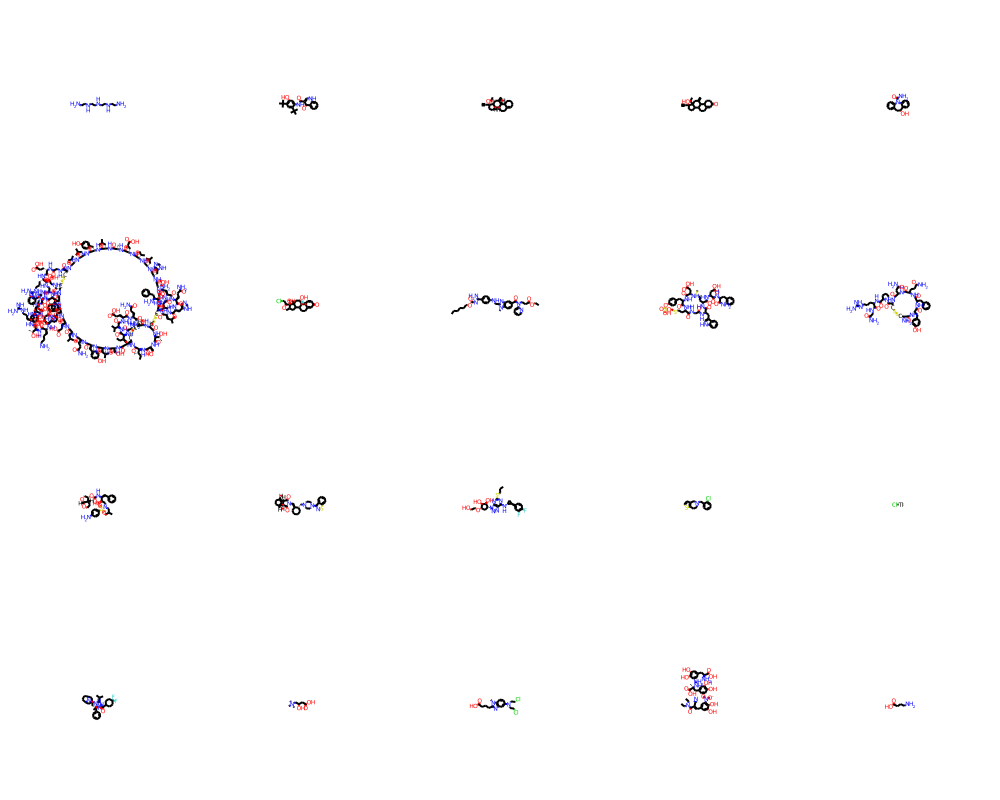

In [15]:
molecules = []

for smile in sider_data_modified.iloc[:20,0]:
  mol = Chem.MolFromSmiles(smile)
  molecules.append(mol)

mol_img = Draw.MolsToGridImage(molecules, molsPerRow=5)

mol_img

In [16]:
allmolecules = []
for smile in sider_data_modified.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  allmolecules.append(mol)

mol_imgs = Draw.MolsToGridImage(allmolecules)

mol_imgs
    
sider_data_modified['Molecules Structure'] = mol_imgs

C:\Users\Admin\anaconda3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


In [17]:
sider_data_modified.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecules Structure
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,1,1,0,<IPython.core.display.Image object>
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,0,1,0,<IPython.core.display.Image object>
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,<IPython.core.display.Image object>
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,<IPython.core.display.Image object>
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,0,<IPython.core.display.Image object>


### Molecule Functions

In [18]:
def get_morgan(molecule, length=512):
    try:
        # radius=2 = ECFP4, radius=3 = ECFP6, etc.
        desc = rdMolDescriptors.GetMorganFingerprintAsBitVect(molecule, 2, nBits=length)
    except Exception as e:
        print(e)
        print('error ' + str(molecule))
        desc = np.nan
    return desc

In [19]:
def get_maccs(molecule):
    try:
        maccs = rdMolDescriptors.GetMACCSKeysFingerprint(molecule)
        # Does not have length
    except Exception as e:
        print(e)
        print("error" + str(molecule))
        maccs = np.nan
    return maccs

In [20]:
def get_atompairs(molecule, length=512):
    try:
        atompairs = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(molecule, nBits=length)
    except Exception as e:
        print(e)
        print("error" + str(molecule))
        atompairs = np.nan
    return atompairs

In [21]:
def get_topological_torsion(molecule, length=512):
    try:
        tt = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(molecule, nBits=length)
    except Exception as e:
        print(e)
        print("error" + str(molecule))
        tt = np.nan
    return tt

## Fingerprints with 'x' size

In [22]:
fingerprint = []
x = {}
for smile in sider_data_modified.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  fingerprint.append(rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius = 2, bitInfo = x))
    
sider_data_modified['Fingerprint'] = fingerprint

In [23]:
sider_data_modified.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecules Structure,Fingerprint
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,1,1,0,0,1,1,1,0,<IPython.core.display.Image object>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,<IPython.core.display.Image object>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,1,0,0,0,0,1,0,<IPython.core.display.Image object>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,<IPython.core.display.Image object>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,1,1,0,0,1,0,1,0,<IPython.core.display.Image object>,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Auxiliary Function

In [24]:
def to_numpyarray_to_list(desc):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(desc, arr)
    return arr.tolist()

## Fingerprints

In [25]:
def create_ecfp4_fingerprint(df_molecules, length=512, write=False):
    # Morgan Fingerprint (ECFP4)
    df_w = df_molecules.copy()
    df_w["ECFP4"] = df_w["mols"].apply(lambda x: get_morgan(x, length)).apply(to_numpyarray_to_list)

    # New DF with one column for each ECFP bit
    ecfp_df = df_w['ECFP4'].apply(pd.Series)
    ecfp_df = ecfp_df.rename(columns=lambda x: 'ECFP4_' + str(x + 1))

    # Write to csv
    if write:
        ecfp_df.to_csv("./dataframes/ecfp4.csv")
    return ecfp_df

In [26]:
def create_maccs_fingerprint(df_molecules, write=False):
    # MACCS keys
    df_w = df_molecules.copy()
    df_w["MACCS"] = df_w["mols"].apply(get_maccs).apply(to_numpyarray_to_list)

    # New DF with one column for each MACCS key
    maccs_df = df_w['MACCS'].apply(pd.Series)
    maccs_df = maccs_df.rename(columns=lambda x: 'MACCS_' + str(x + 1))

    # Write to csv
    if write:
        maccs_df.to_csv("./dataframes/maccs.csv")
    return maccs_df

In [27]:
def create_atompairs_fingerprint(df_molecules, length=512, write=False):
    # ATOM PAIRS
    df_w = df_molecules.copy()
    df_w["ATOMPAIRS"] = df_w["mols"].apply(lambda x: get_atompairs(x, length)).apply(
        to_numpyarray_to_list)

    # New DF with one column for each ATOM PAIRS key
    atom_pairs_df = df_w['ATOMPAIRS'].apply(pd.Series)
    atom_pairs_df = atom_pairs_df.rename(columns=lambda x: 'ATOMPAIR_' + str(x + 1))

    # Write to csv
    if write:
        atom_pairs_df.to_csv("./dataframes/atom_pairs.csv")
    return atom_pairs_df

In [28]:
def create_topological_torsion_fingerprint(df_molecules, length=512, write=False):
    # Topological Torsion
    df_w = df_molecules.copy()
    df_w["TT"] = df_w["mols"].apply(lambda x: get_topological_torsion(x, length)).apply(to_numpyarray_to_list)

    # New DF with one column for each Topological torsion key
    tt_df = df_w['TT'].apply(pd.Series)
    tt_df = tt_df.rename(columns=lambda x: 'TT' + str(x + 1))

    # Write to csv
    if write:
        tt_df.to_csv("./dataframes/topological_torsion.csv")
    return tt_df

## Descriptors

In [29]:
df_molecules = pd.read_csv('df_molecules.csv')

In [30]:
def calc_descriptors(df_molecules, write=False):
    # Make a copy of the molecule dataframe
    df_mols_desc = df_molecules.copy()

In [31]:
molwt = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    molwt.append(Descriptors.MolWt(mols))

sider_data_modified['Molecular_Weight'] = molwt

In [32]:
molweight = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    molweight.append(Descriptors.ExactMolWt(mols))

sider_data_modified['Molecular_ExactWeight'] = molweight

In [33]:
hatommolwt = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    hatommolwt.append(Descriptors.HeavyAtomMolWt(mols))

sider_data_modified['HeavyAtom_MolWt'] = hatommolwt

In [34]:
maxabspartcharge = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    maxabspartcharge.append(Descriptors.MaxAbsPartialCharge(mols))

sider_data_modified['MaxAbs_PartialCharge'] = maxabspartcharge

In [35]:
maxpartcharge = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    maxpartcharge.append(Descriptors.MaxPartialCharge(mols))

sider_data_modified['Max_PartialCharge'] = maxpartcharge

In [36]:
minabspc = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    minabspc.append(Descriptors.MinAbsPartialCharge(mols))

sider_data_modified['MinAbs_PartialCharge'] = minabspc

In [37]:
minpartcharge = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    minpartcharge.append(Descriptors.MinPartialCharge(mols))

sider_data_modified['Min_PartialCharge'] = minpartcharge

In [38]:
numrade = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numrade.append(Descriptors.NumRadicalElectrons(mols))

sider_data_modified['Num_RadicalElectrons'] = numrade

In [39]:
numval = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numval.append(Descriptors.NumValenceElectrons(mols))

sider_data_modified['Num_ValenceElectrons'] = numval

In [40]:
sider_data_modified.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,Fingerprint,Molecular_Weight,Molecular_ExactWeight,HeavyAtom_MolWt,MaxAbs_PartialCharge,Max_PartialCharge,MinAbs_PartialCharge,Min_PartialCharge,Num_RadicalElectrons,Num_ValenceElectrons
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",189.307,189.195346,166.123,0.329208,0.007723,0.007723,-0.329208,0,80
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",392.499,392.209993,364.275,0.507573,0.260657,0.260657,-0.507573,0,152
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",310.481,310.229666,280.241,0.377010,0.130896,0.130896,-0.377010,0,124
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",324.464,324.208930,296.240,0.377010,0.155177,0.155177,-0.377010,0,128
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",254.289,254.105528,240.177,0.387989,0.323402,0.323402,-0.387989,0,96


## Lipinski

In [41]:
fracsp33 = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    fracsp33.append(Lipinski.FractionCSP3(mols))

sider_data_modified['FractionCSP3'] = fracsp33

In [42]:
heavyatomcount = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    heavyatomcount.append(Lipinski.HeavyAtomCount(mols))

sider_data_modified['HeavyAtomCount'] = heavyatomcount

In [43]:
nhohcount = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    nhohcount.append(Lipinski.NHOHCount(mols))

sider_data_modified['NHOHCount'] = nhohcount

In [44]:
nocount = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    nocount.append(Lipinski.NOCount(mols))

sider_data_modified['NOCount'] = nocount

In [45]:
aliphcarbocycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    aliphcarbocycles.append(Lipinski.NumAliphaticCarbocycles(mols))

sider_data_modified['NumAliphaticCarbocycles'] = aliphcarbocycles

In [46]:
aliphhetcycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    aliphhetcycles.append(Lipinski.NumAliphaticHeterocycles(mols))

sider_data_modified['NumAliphaticHeterocycles'] = aliphhetcycles

In [47]:
aliphrings = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    aliphrings.append(Lipinski.NumAliphaticRings(mols))

sider_data_modified['NumAliphaticRings'] = aliphrings

In [48]:
arocarbocycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    arocarbocycles.append(Lipinski.NumAromaticCarbocycles(mols))

sider_data_modified['NumAromaticCarbocycles'] = arocarbocycles

In [49]:
arohetcycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    arohetcycles.append(Lipinski.NumAromaticHeterocycles(mols))

sider_data_modified['NumAromaticHeterocycles'] = arohetcycles

In [50]:
arorings = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    arorings.append(Lipinski.NumAromaticRings(mols))

sider_data_modified['NumAromaticRings'] = arorings

In [51]:
numhacceptors = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numhacceptors.append(Lipinski.NumHAcceptors(mols))

sider_data_modified['NumHAcceptors'] = numhacceptors

In [52]:
numhdonors = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numhdonors.append(Lipinski.NumHDonors(mols))

sider_data_modified['NumHDonors'] = numhdonors

In [53]:
numhatoms = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numhatoms.append(Lipinski.NumHeteroatoms(mols))

sider_data_modified['NumHeteroatoms'] = numhatoms

In [54]:
numrotbonds = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numrotbonds.append(Lipinski.NumRotatableBonds(mols))

sider_data_modified['NumRotatableBonds'] = numrotbonds

In [55]:
numsatcarbcycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numsatcarbcycles.append(Lipinski.NumSaturatedCarbocycles(mols))

sider_data_modified['NumSaturatedCarbocycles'] = numsatcarbcycles

In [56]:
numsathetcycles = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numsathetcycles.append(Lipinski.NumSaturatedHeterocycles(mols))

sider_data_modified['NumSaturatedHeterocycles'] = numsathetcycles

In [57]:
numsatrings = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    numsatrings.append(Lipinski.NumSaturatedRings(mols))

sider_data_modified['NumSaturatedRings'] = numsatrings

In [58]:
ringcount = []
for smile in sider_data_modified.iloc[:,0]:
    mols = Chem.MolFromSmiles(smile)
    ringcount.append(Lipinski.RingCount(mols))

sider_data_modified['RingCount'] = ringcount

In [59]:
sider_data_modified.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,0,5,5,5,10,0,0,0,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,3,3,3,5,2,0,0,0,3
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,1,1,1,1,3,0,3,4
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,0,0,2,1,2,1,3,0,3,4
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,0,2,2,2,4,0,0,0,0,3
